In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Primero trabajaremos en el vacío
eps0=8.8541878128E-12
miu0=4*np.pi*1e-7

In [5]:
eps=np.ones(imáx)*eps0
eps[350:400]=2.30*eps0 #película delgada de vidrio

In [6]:
material=eps>eps0

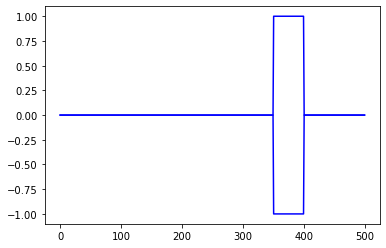

In [7]:
plt.plot(material,'b')
plt.plot(-1*material, 'b')

In [8]:
c0=1/np.sqrt(eps0*miu0)
c0

299792458.0816064

In [9]:
imáx=500
ifuente=10
nmax=2000

In [10]:
lambda_min=350E-9

In [11]:
dy=lambda_min/20

In [12]:
dt=dy/c0

In [13]:
dy, dt

(1.7499999999999998e-08, 5.837371664378671e-17)

In [14]:
imp0=np.sqrt(miu0/eps0)

In [15]:
imp=np.sqrt(miu0/eps)

In [16]:
def fuente(t):
    lambda_0=550E-9
    tau=30
    t0=tau*3
    w0=2*np.pi*c0/lambda_0
    return np.exp(-(t-t0)**2/tau**2)*np.sin(w0*t*dt)
    #return np.exp(-(t-t0)**2/tau**2)
    #return np.sin(w0*t*dt)

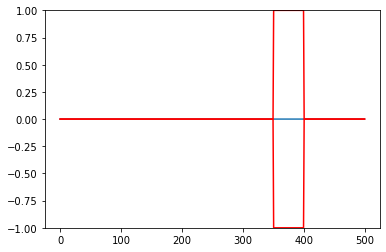

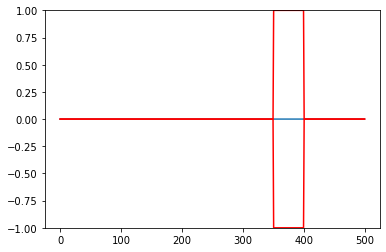

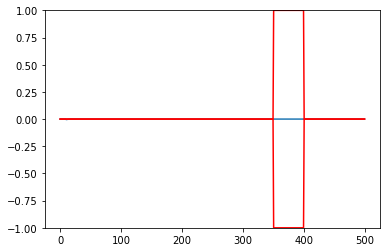

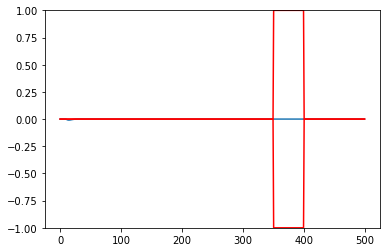

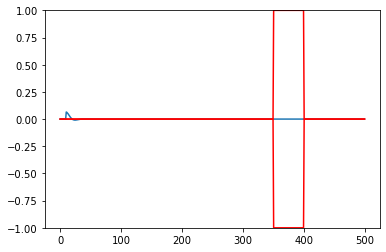

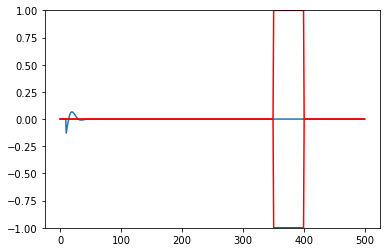

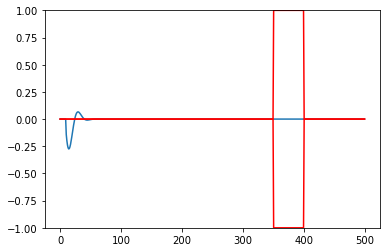

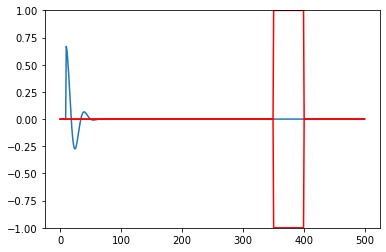

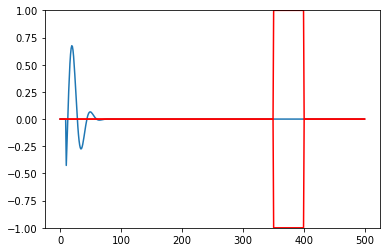

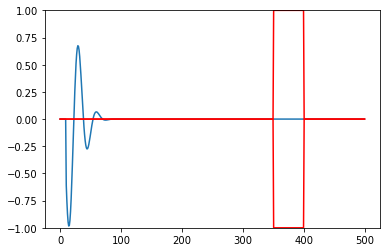

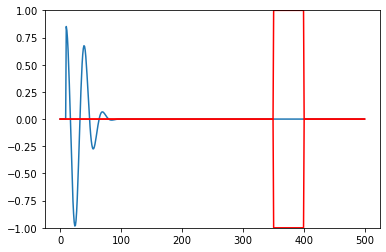

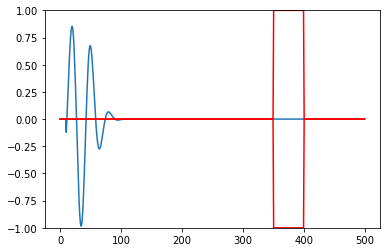

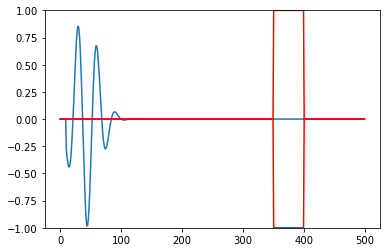

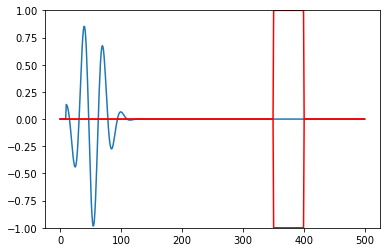

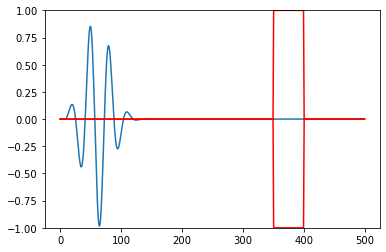

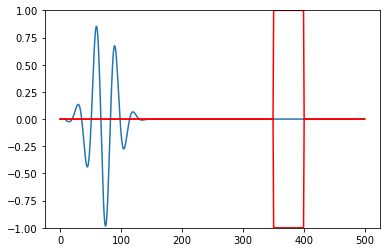

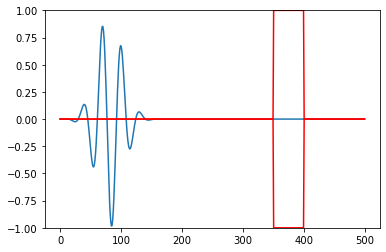

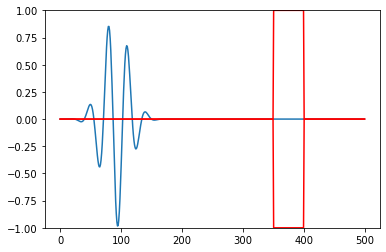

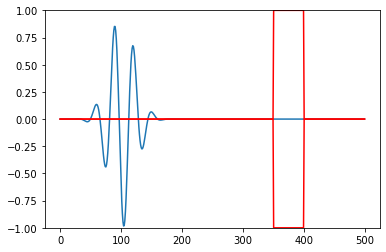

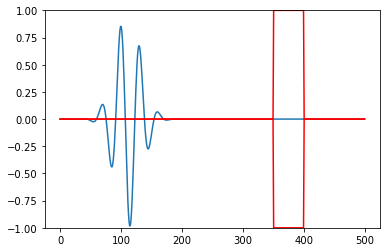

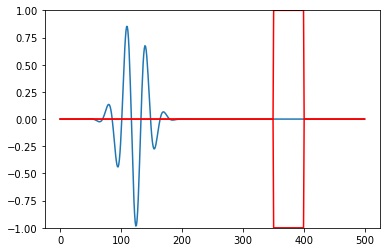

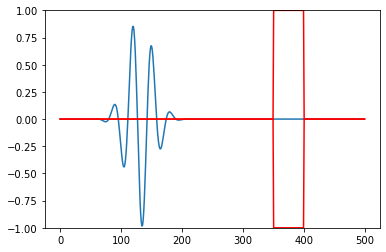

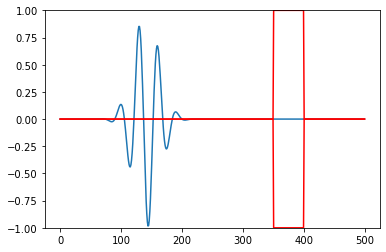

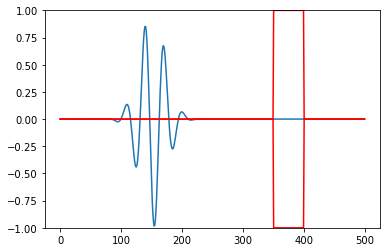

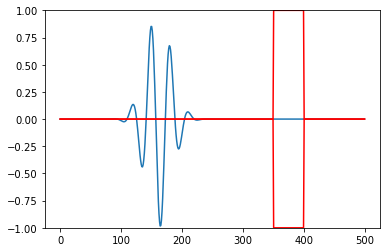

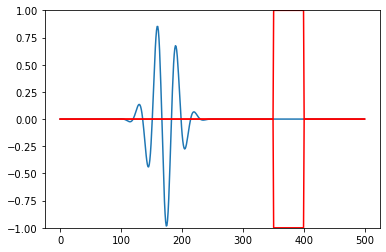

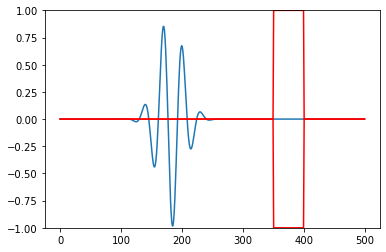

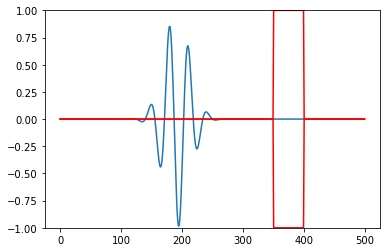

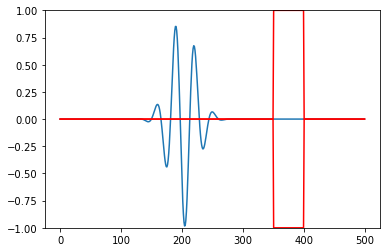

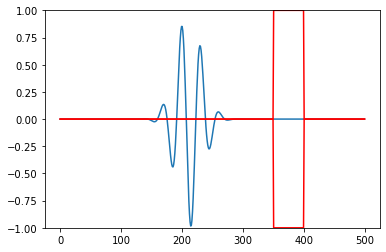

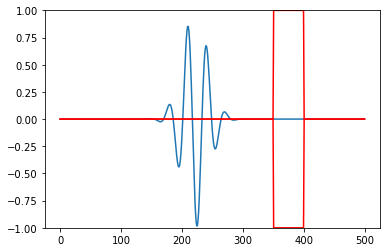

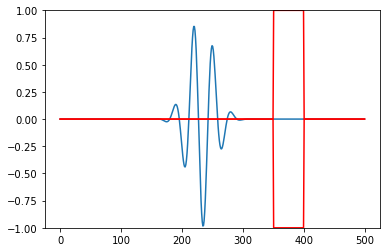

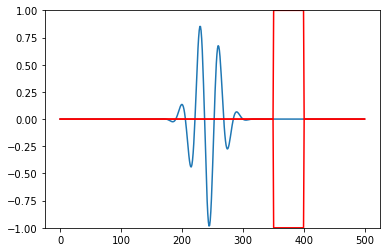

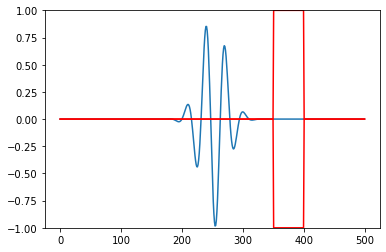

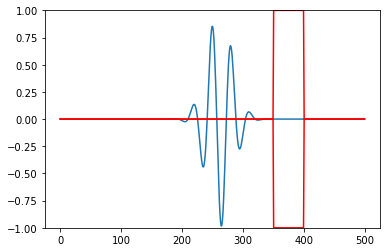

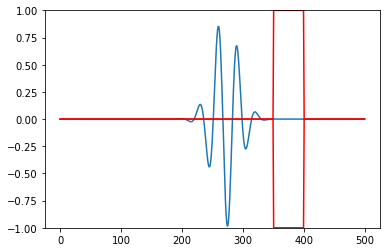

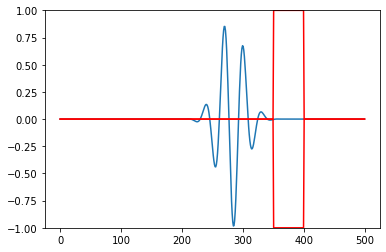

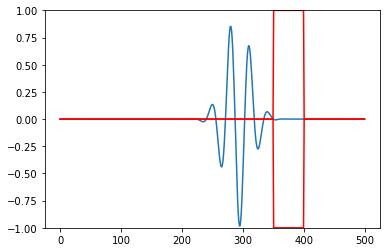

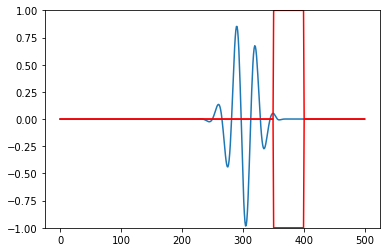

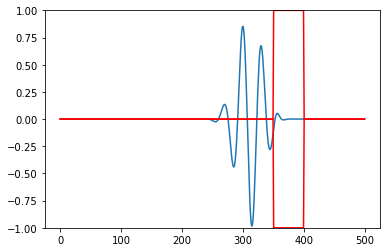

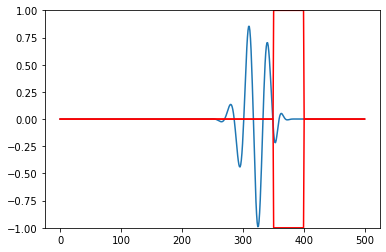

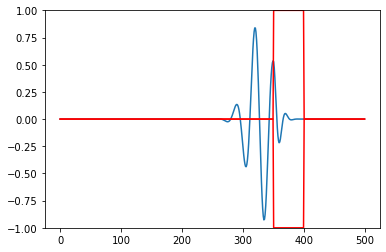

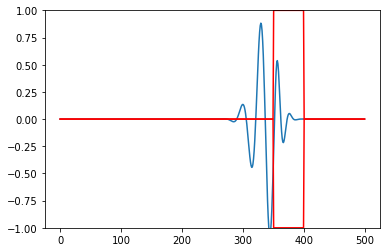

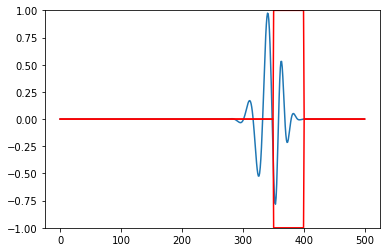

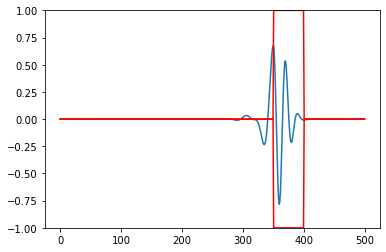

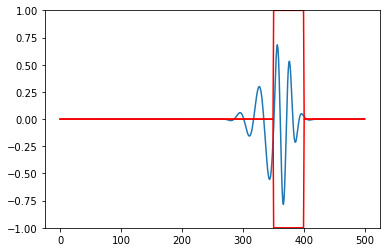

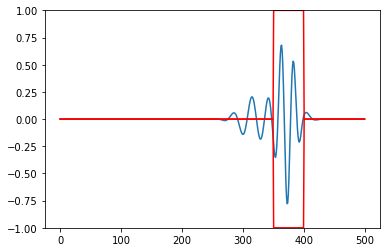

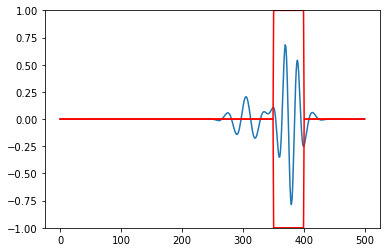

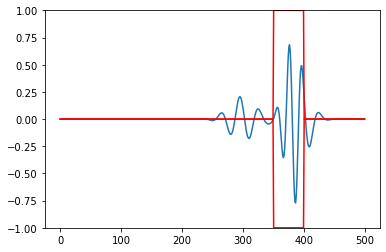

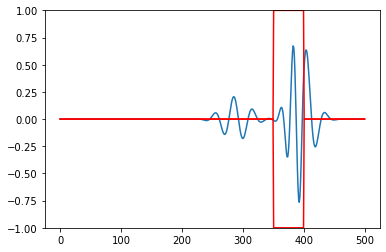

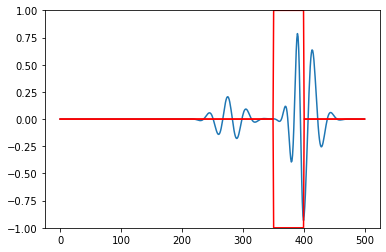

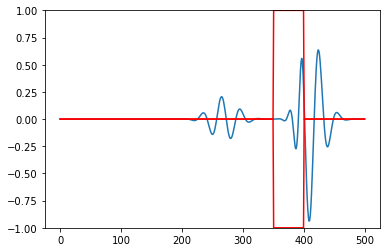

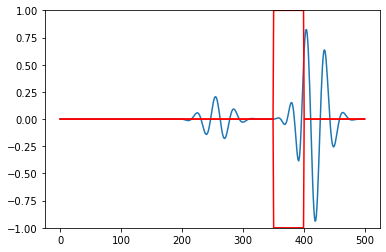

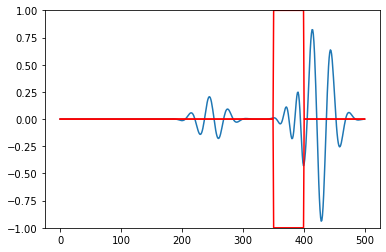

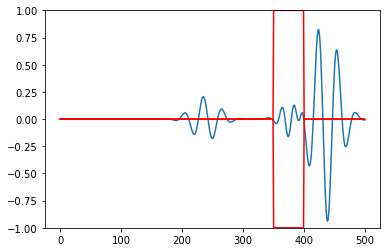

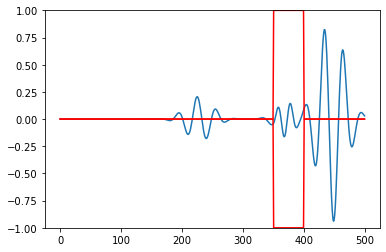

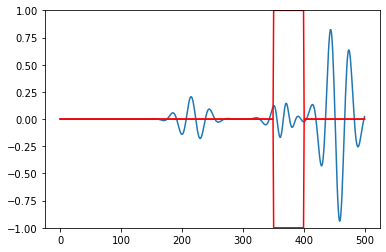

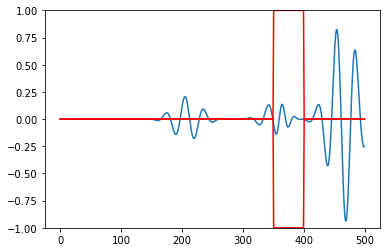

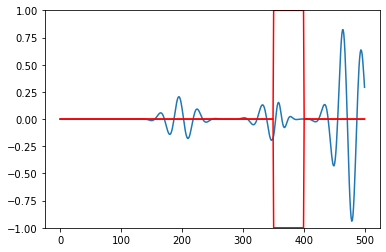

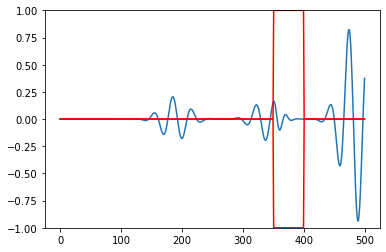

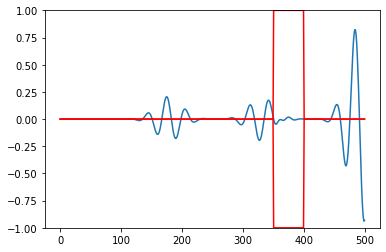

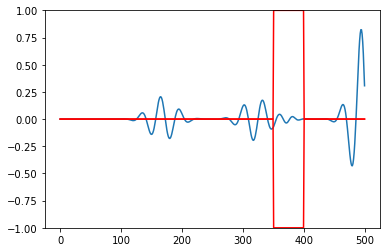

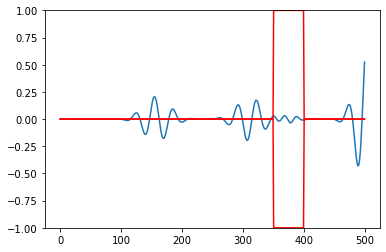

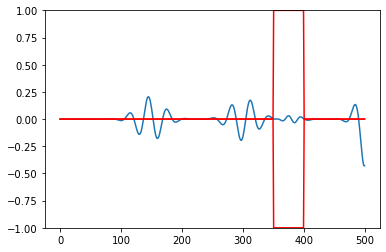

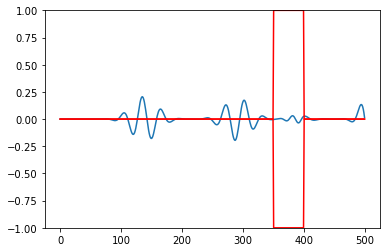

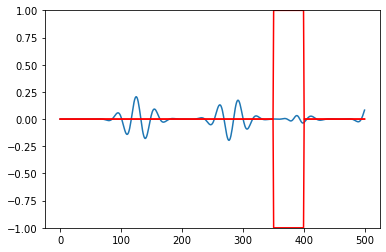

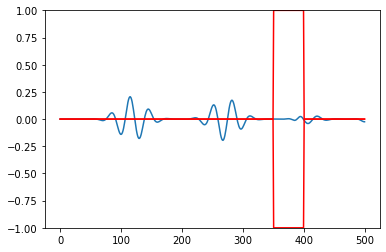

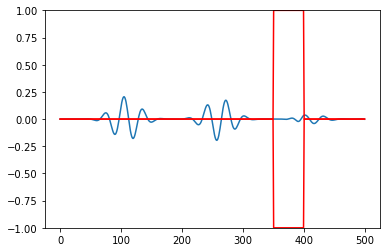

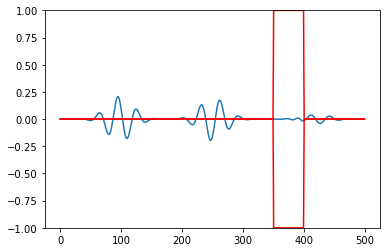

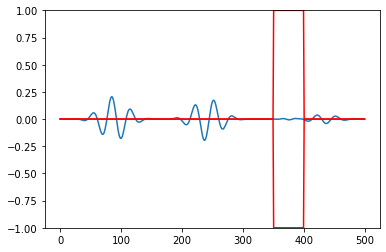

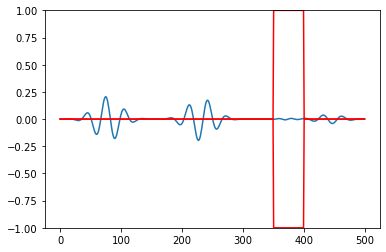

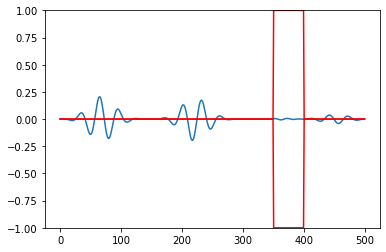

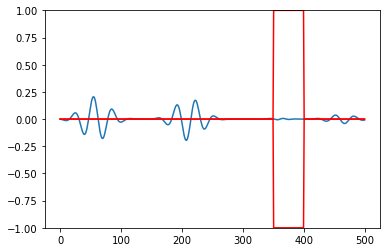

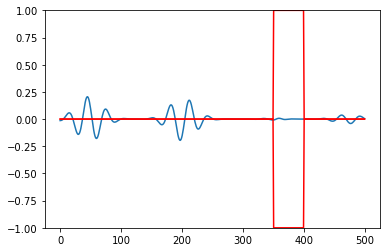

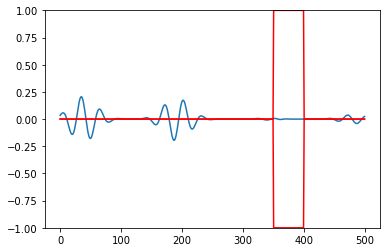

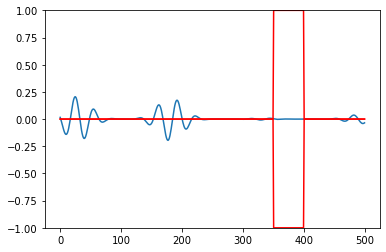

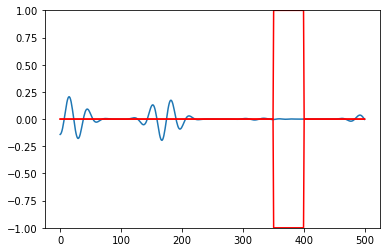

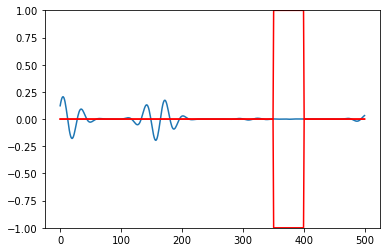

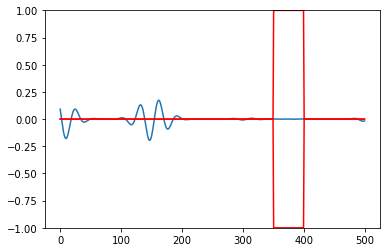

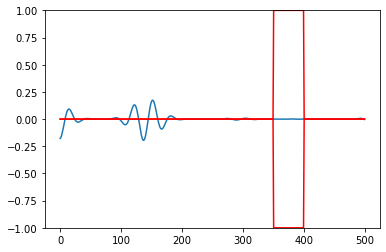

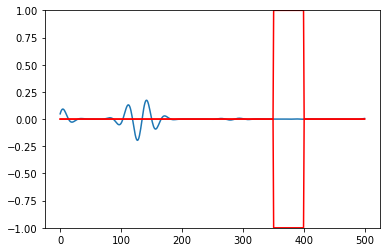

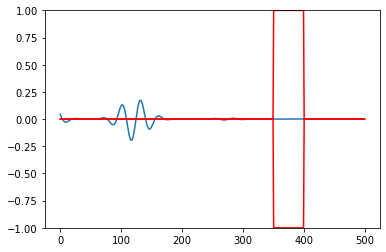

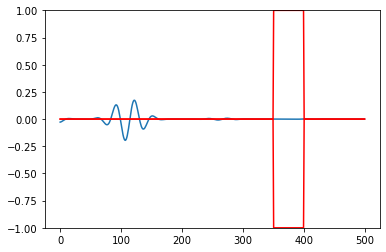

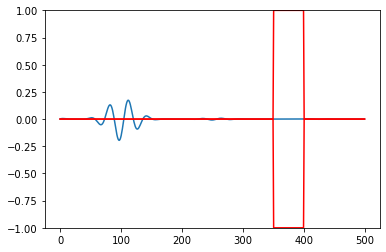

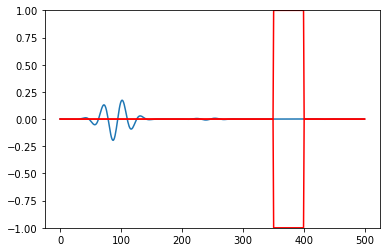

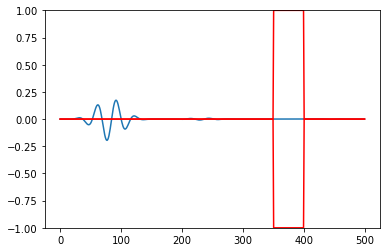

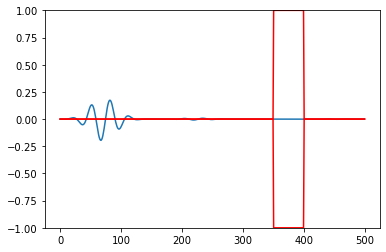

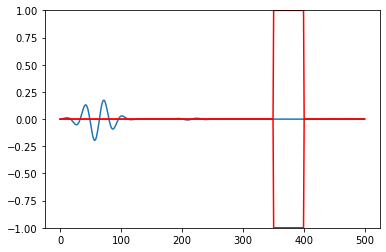

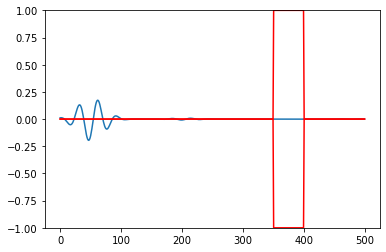

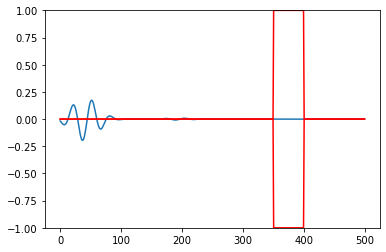

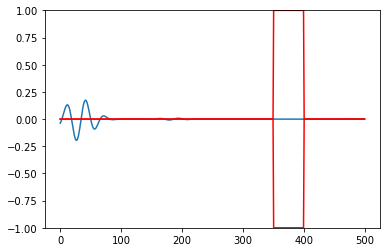

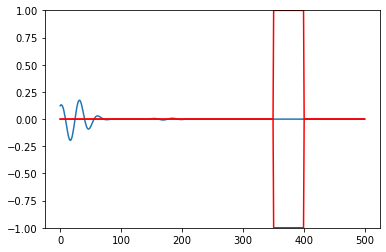

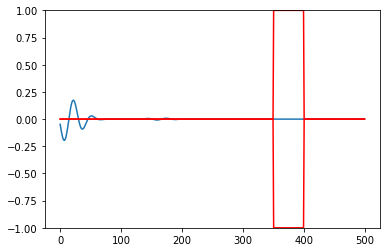

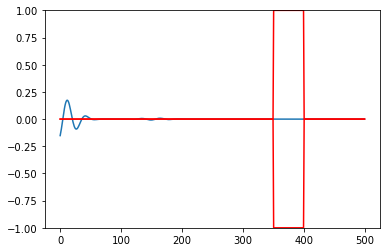

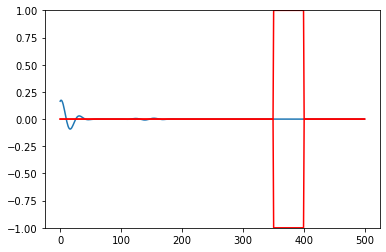

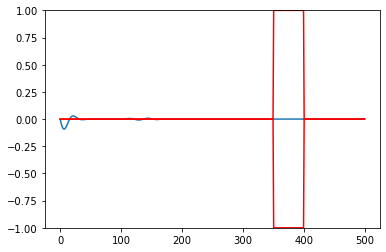

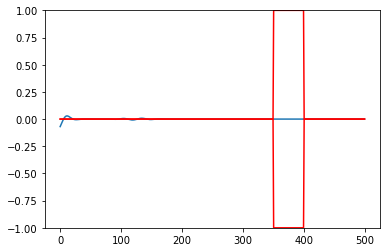

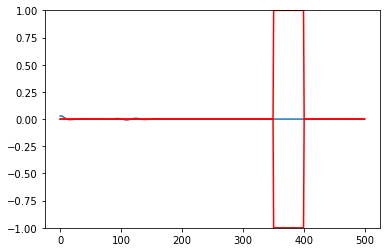

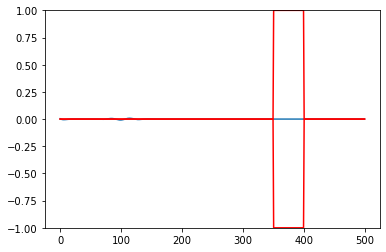

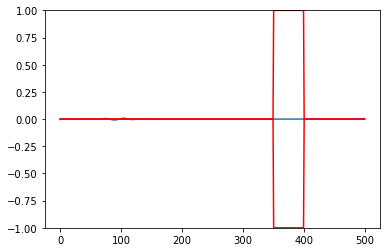

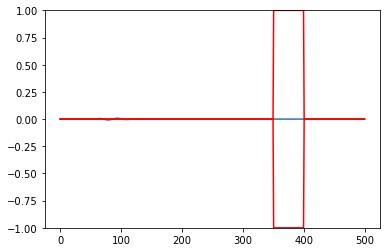

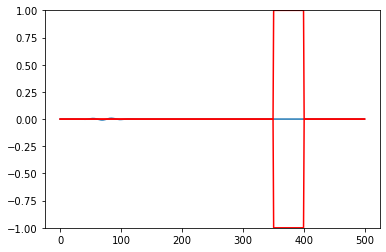

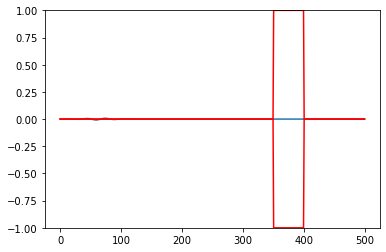

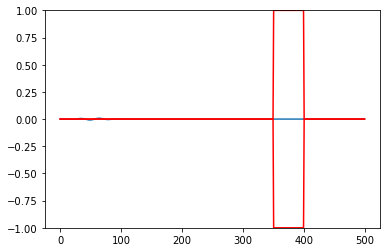

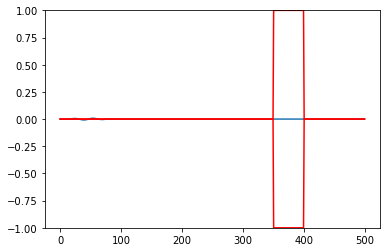

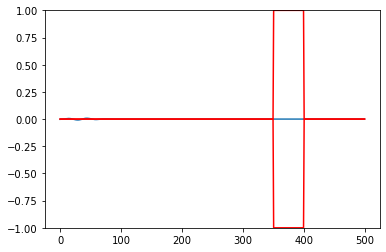

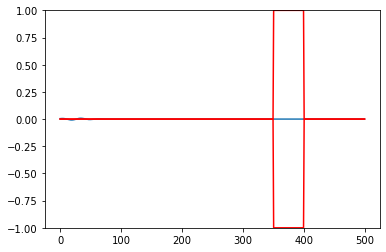

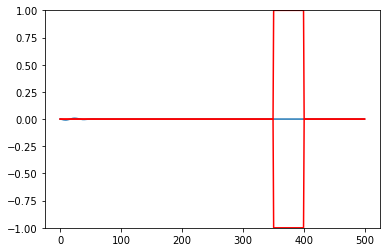

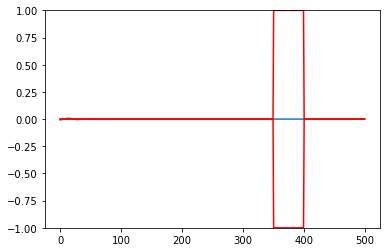

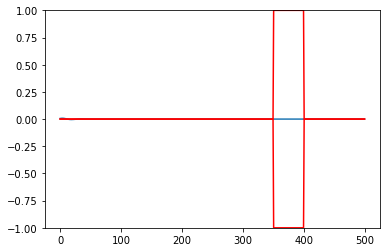

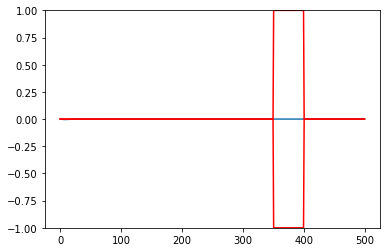

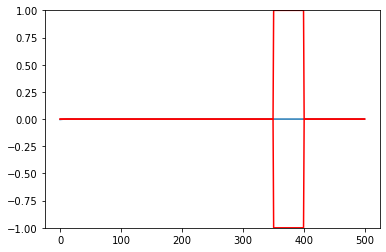

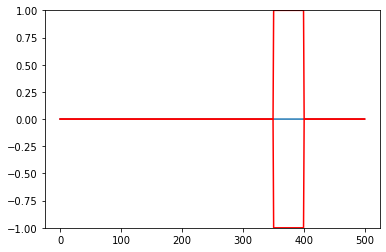

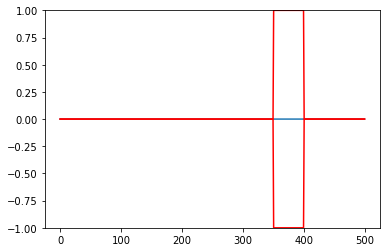

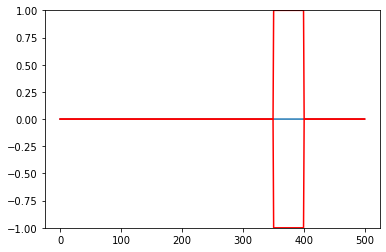

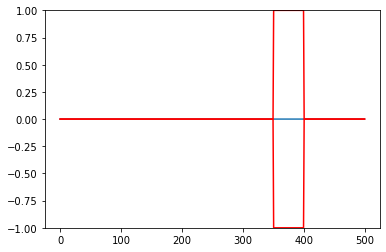

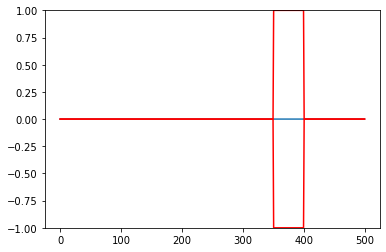

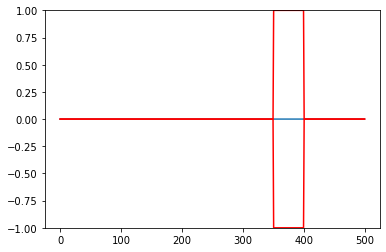

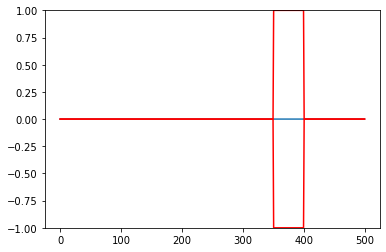

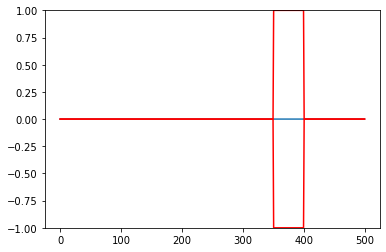

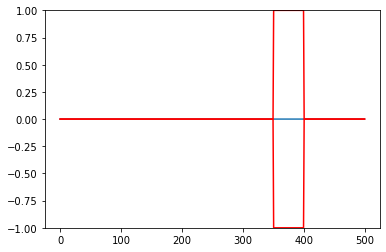

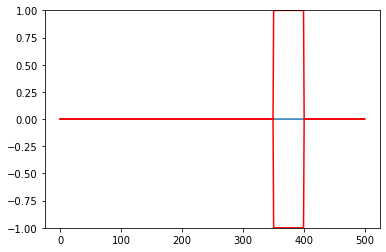

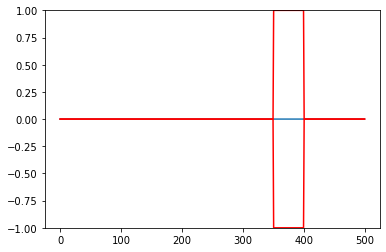

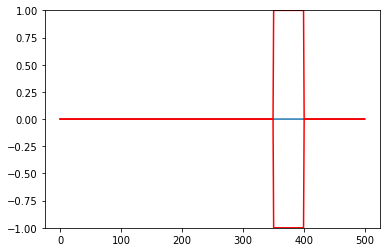

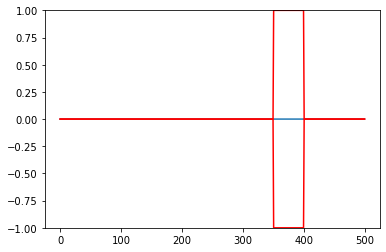

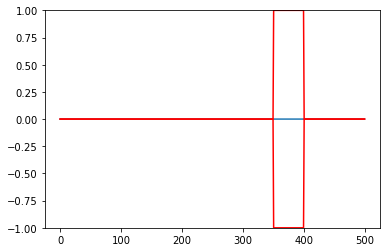

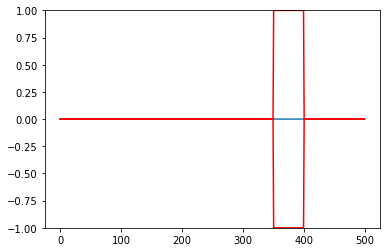

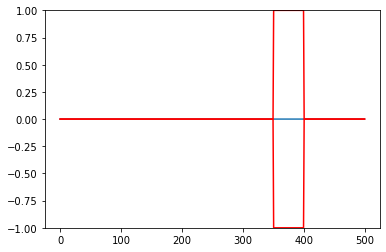

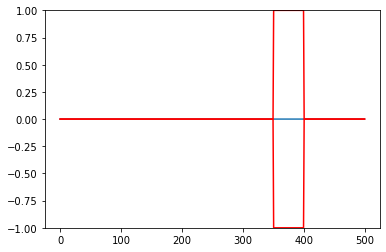

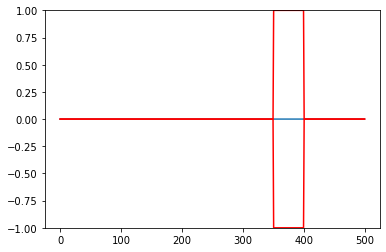

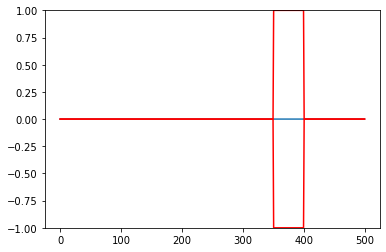

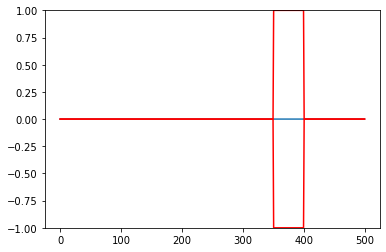

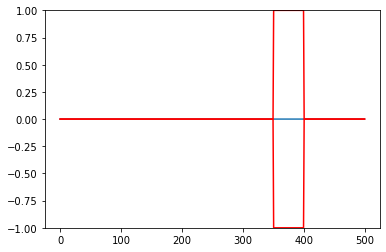

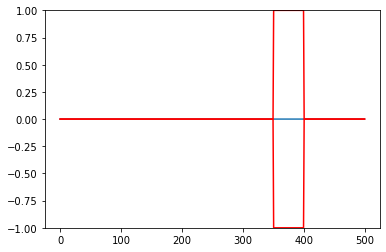

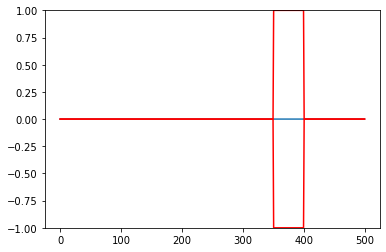

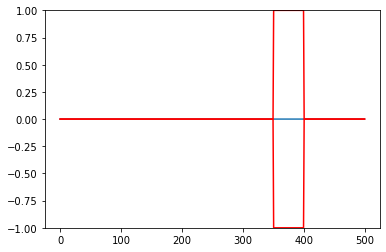

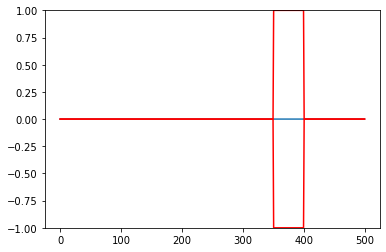

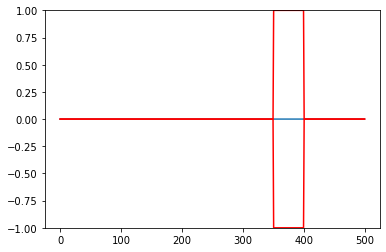

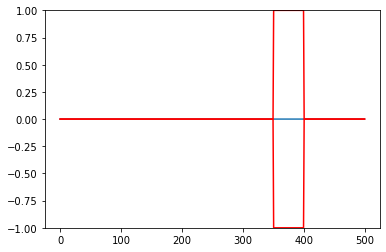

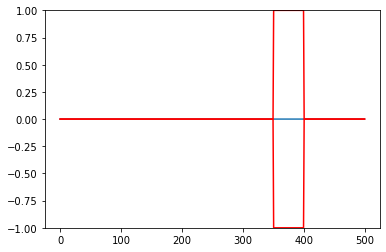

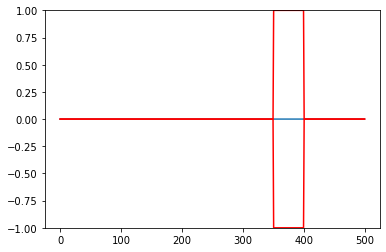

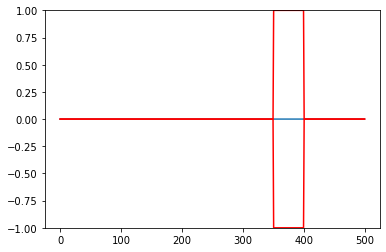

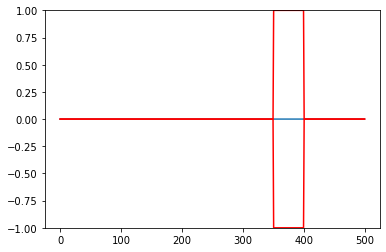

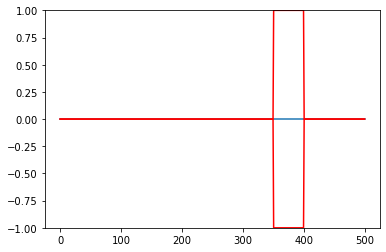

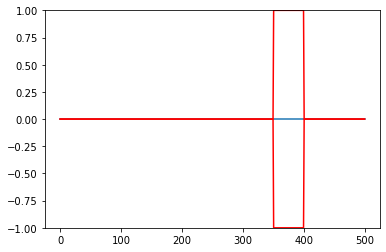

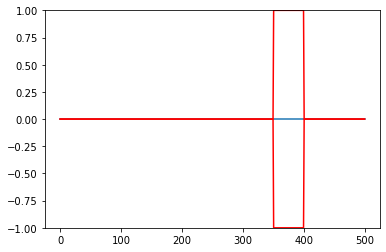

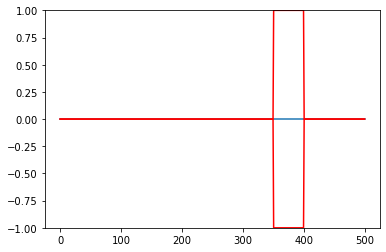

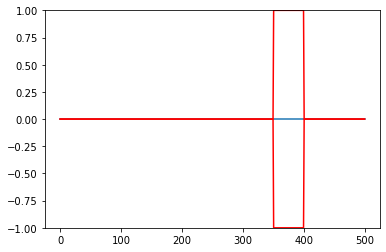

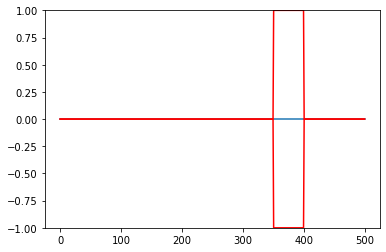

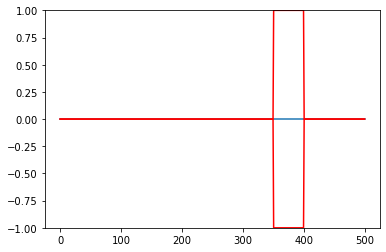

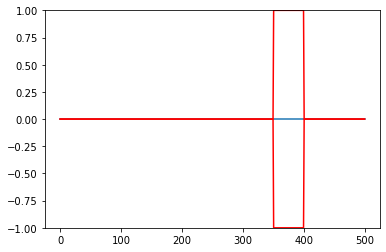

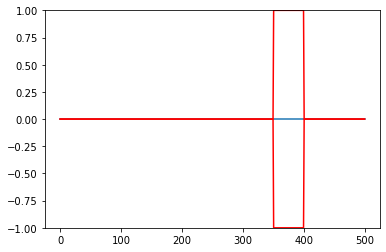

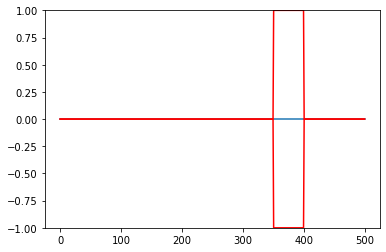

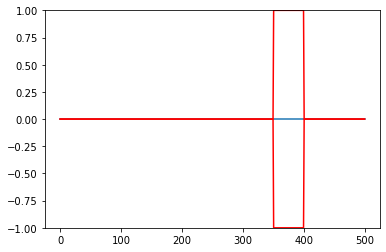

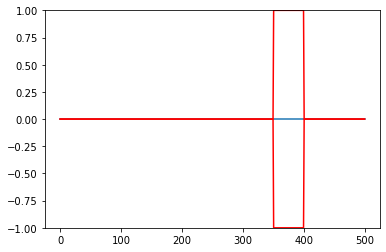

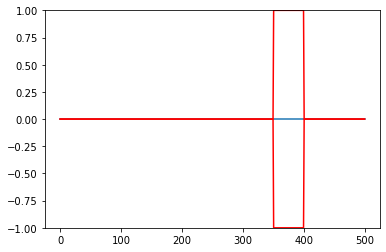

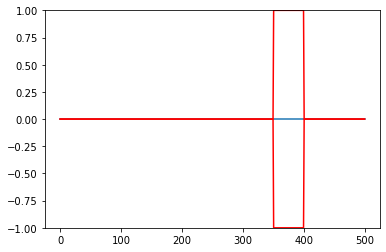

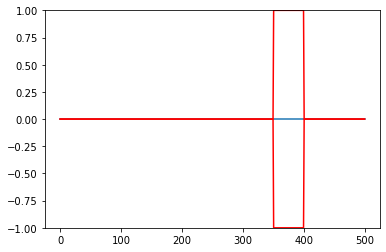

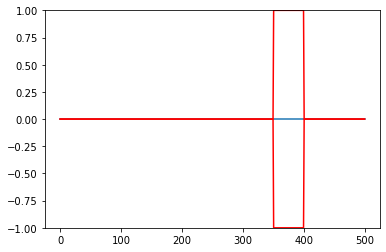

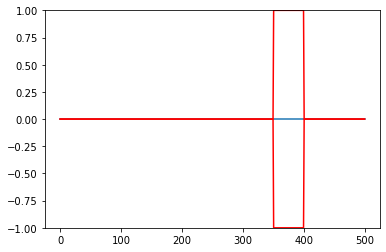

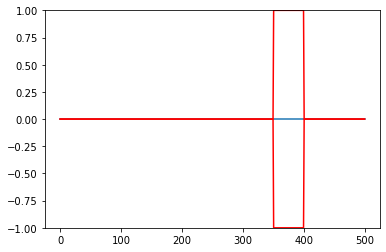

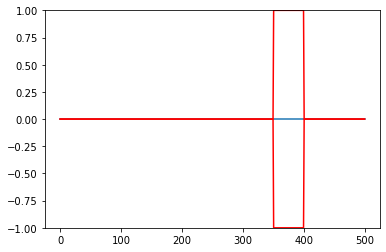

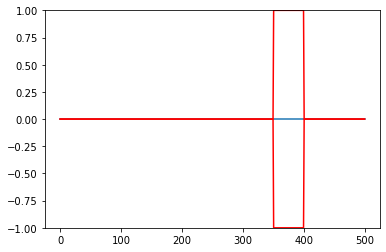

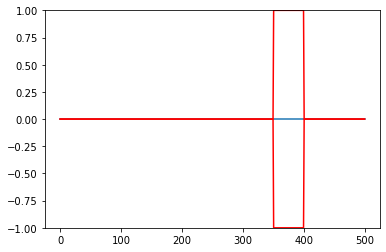

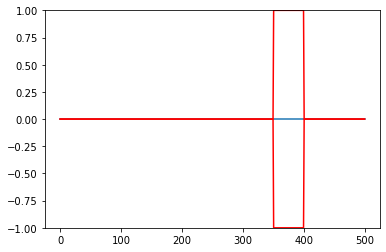

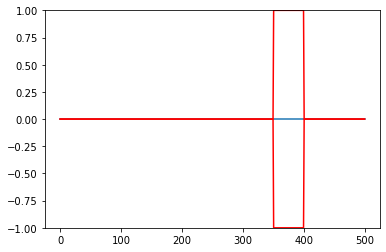

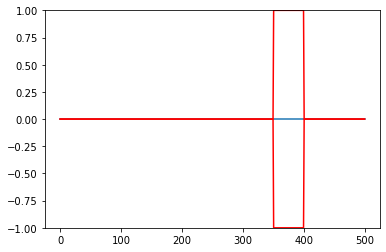

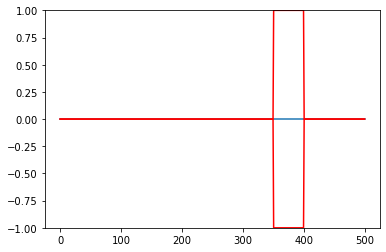

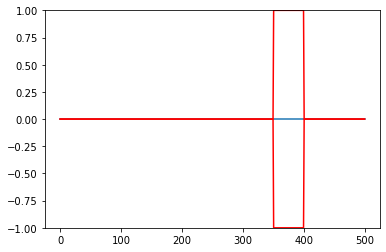

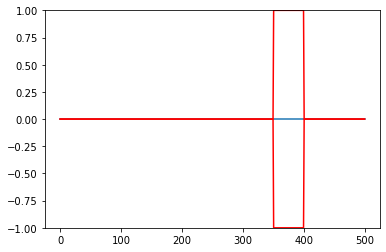

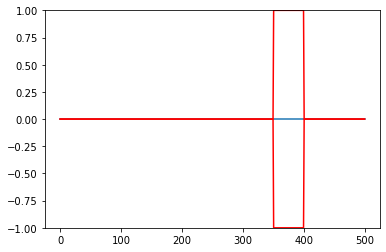

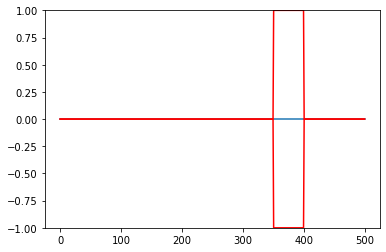

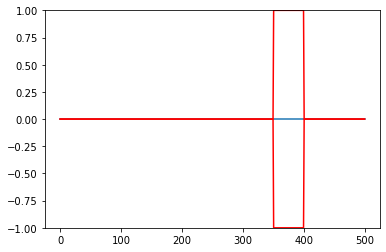

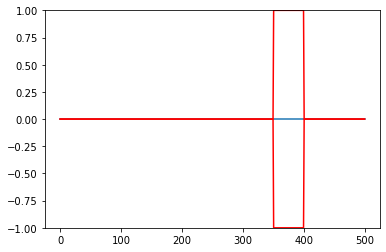

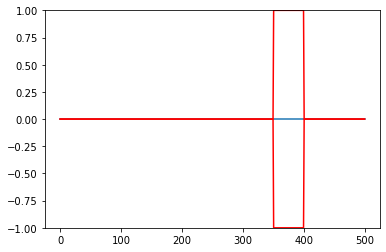

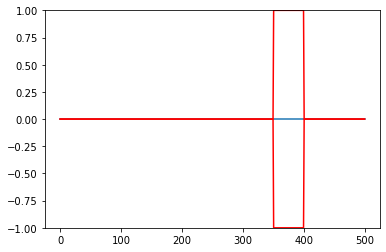

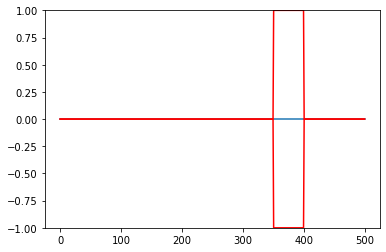

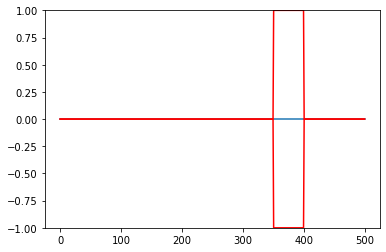

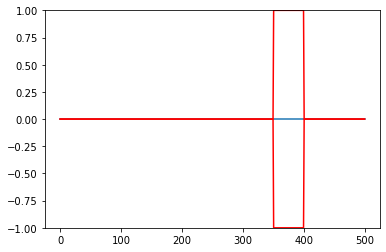

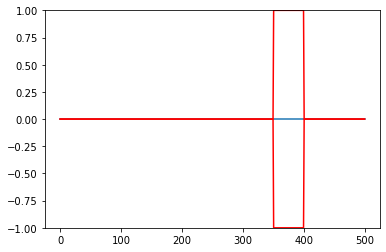

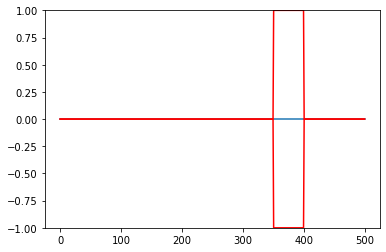

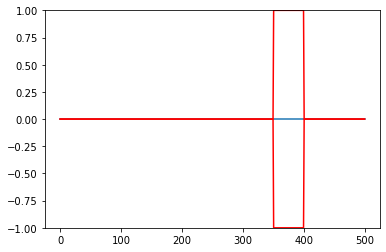

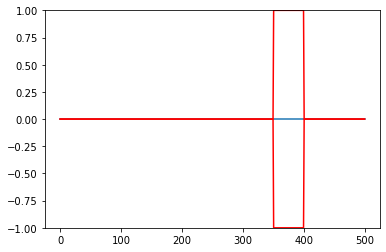

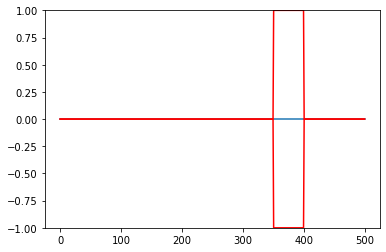

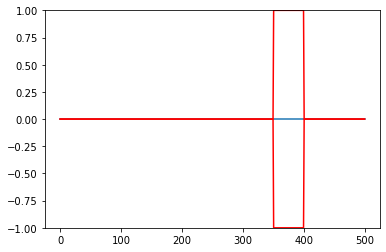

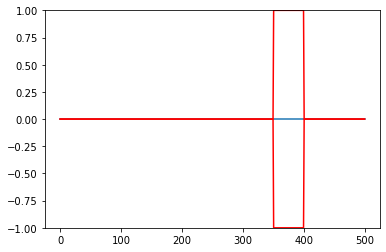

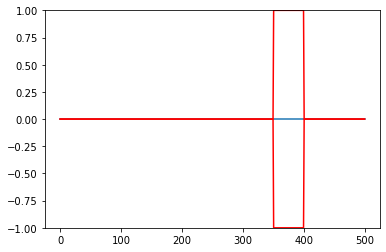

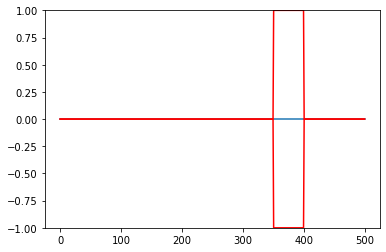

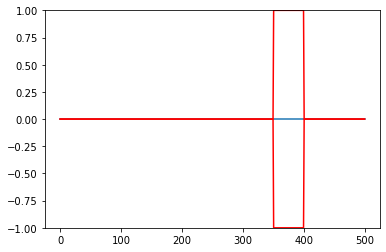

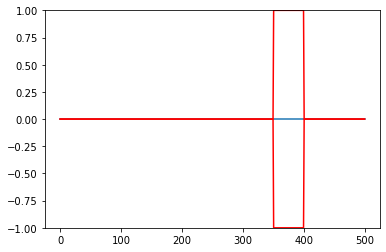

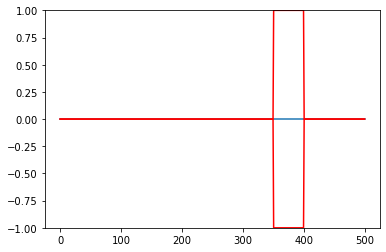

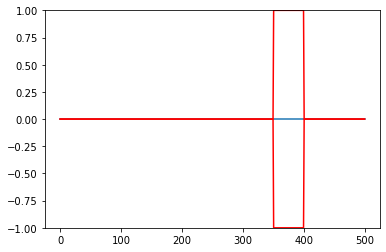

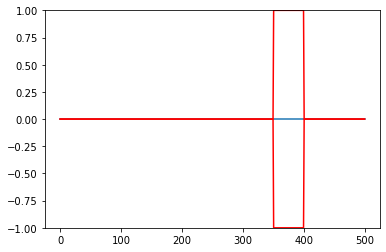

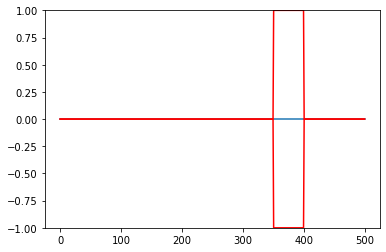

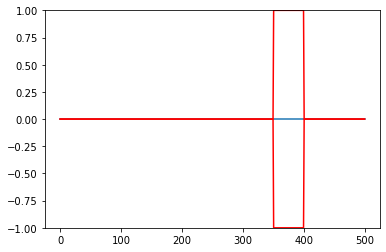

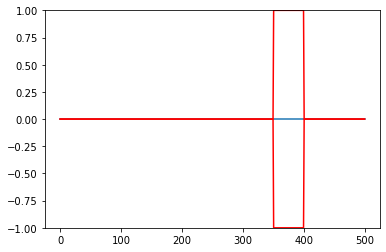

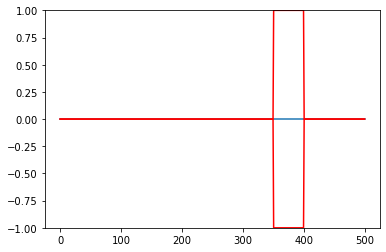

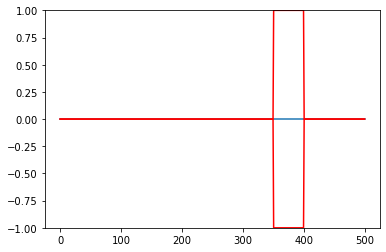

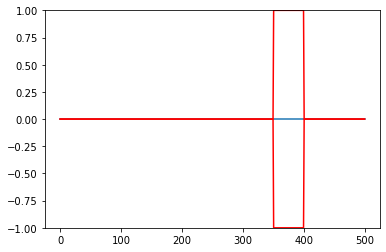

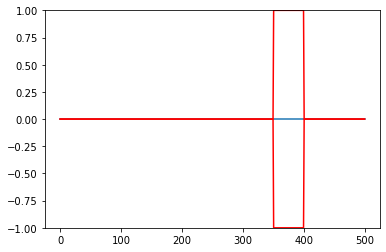

In [17]:
E=np.zeros(imáx)
H=np.zeros(imáx)
E_anterior=np.zeros(imáx)
H_anterior=np.zeros(imáx)

for n in range(nmax):
    #condiciones de frontera absorbente campo magnético
    H[imáx-1]=H_anterior[imáx-2]
    
    for i in range(imáx-1):            
        H[i]=H_anterior[i]+dt/(miu0*dy)*(E[i+1]-E[i])
        H_anterior[i]=H[i]
    #Fuente de campo magnético
    H[ifuente-1]=H[ifuente-1]-fuente(n)/imp[i]
    H_anterior[ifuente-1]=H[ifuente-1]
    
    
    #condiciones de frontera absorbente campo eléctrico
    E[0]=E_anterior[1]
    
    for i in range(1,imáx):        
        E[i]=E_anterior[i]+dt/(eps[i]*dy)*(H[i]-H[i-1])
        E_anterior[i]=E[i]
    #Fuente de campo eléctrico
    E[ifuente]=E[ifuente]+fuente(n+1)
    E_anterior[ifuente]=E[ifuente]
    
    if n%10==0:
        plt.plot(E)
        plt.ylim([-1,1])
        plt.plot(material,'r')
        plt.plot(-1*material, 'r')
        plt.savefig("figura{}.png".format(int(n/10)))
        plt.show()
        plt.close()